# JupyterHub for Pythonic Reporting and Self-Service BI

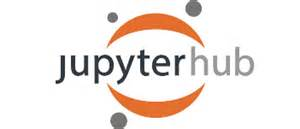

In [5]:
from IPython.display import Image
Image('hub.jpeg')

# About Me

3 year Supply Chain Analyst who got addicted to Python for analytics and reporting. Worked supporting manufacturing organizations. Built out no-budget reporting solutions to serve various cross-department needs with a JupyterHub server running python notebooks. Newly minted Analytics Experience consultant with Avanade.


# Outline

## 1. Introduction to JupyterHub

## 2. Why JupyterHub @ Cenveo

## 3. JupyterHub Installation

## 4. JupyterHub General Configuration

## 5. JupyterHub Configuration for Pythonic Reporting and Self-Service BI

## 6. Result @ Cenveo

## 7. Possible Improvements

# Introduction to JupyterHub

- "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text" (Jupyter Project)

- JupyterHub is "A multi-user version of the [Jupyter] notebook designed for companies, classrooms and research labs" (Jupyter Project). 

- Creates a "multi-user Hub which spawns, manages, and proxies multiple instances of the single-user Jupyter notebook server" (JupyterHub Github)


# Introduction to JupyterHub

From JupyterHub GitHub:

Three main actors make up JupyterHub:

   - multi-user Hub (tornado process)
   - configurable http proxy (node-http-proxy)
   - multiple single-user Jupyter notebook servers (Python/Jupyter/tornado)

Basic principles for operation are:

 - Hub launches a proxy.
 - Proxy forwards all requests to Hub by default.
 - Hub handles login, and spawns single-user servers on demand.
 - Hub configures proxy to forward url prefixes to the single-user notebook servers.
 - JupyterHub also provides a REST API for administration of the Hub and its users.

# Introduction to JupyterHub

 - Live Demo

# Why JupyterHub @ Cenveo

- Needed to be able to share results of python computations with my team in Supply Chain.  

- Wanted an interactive web-environment.

- Sought quick implementation.

- Had no budget for direct hardware or software implemantation on this project.

# JupyterHub Installation

- System Requirements from JupyterHub Github:
    - Unix-like OS
    - Python 3.4 or greater
    - nodejs/npm (for the proxy)
    - TLS/SSL certificates
    - Domain Name

# JupyterHub Installation

- Install NodeJS
    - need to install nodejs-legacy package for Debian/Ubuntu
        - sudo apt-get install npm nodejs-legacy
    - Otherwise nodejs for other distributions
        - Example Red Hat installation:
            - curl --silent --location https://rpm.nodesource.com/setup_10.x | sudo bash -
            - sudo yum -y install nodejs
            - sudo yum install gcc-c++ make for compiling and installing native addons from npm
    - More detail on Node.js's website under 'Installing Node.js via package manager'
    - Sourced from JupyterHub github and Node.js website. 

    

# JupyterHub Installation

 - Install Proxy
     - npm install -g configurable-http-proxy
 - Install JupyterHub
     - pip install jupyterhub (pip3 if working with both python 2 and 3)


# JupyterHub Installation

- Running JupyterHub
    - Basic, non-accessible: jupyterhub
    - Accessible: sudo jupyterhub
- Logging into JupyterHub
    - Basic installation uses Unix credentials
    - Mulitiple authentication schemes available


# JupyterHub General Configuration

- From JupyterHub Github:
    - Generate config file:
        - jupyterhub --generate-config
    - Start JupyterHub with command line arguments:
        - jupyterhub --ip 10.0.1.2 --port 443 --ssl-key my_ssl.key --ssl-cert my_ssl.cert



# JupyterHub General Configuration

- From JupyterHub Github and various downstream links from that page:
    - Significant options for authentication:
        - PAM
        - Oauth, including Azure and Github itself
        - Kerberos
        - More
    - Significant options for spawners:
        - LocalProcess (default and my current implementation)
        - Docker
        - Kubernetes
        - Sudospawner, non-root spawner of single user servers.
    - Docker deployement as well
    - JupyterHub not officially supported on Windows

# JupyterHub General Configuration

- From JupyterHub Read the Docs:
    - Configuring SSL/TSL
        - c.JupyterHub.ssl_key = '/path/to/my.key'
        - c.JupyterHub.ssl_cert = '/path/to/my.cert'
        - LetsEncrypt support available
    - Important because JupyterHub runs arbitraty code against a system


# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

 - Overall Set Up
     - Ubuntu 16.04 Server LTS
     - Let's Encrypt SSL
     - Runnable as Service
     - Custom Notebook Standards
     - Custom Extensions



# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- Ubuntu System Set Up
    - Static IP
    - PAM Authentication
    - Dedicated '/notebooks' directory for serving the notebook servers
    - Used groups and permissions to control access
        - Placed users in groups by department
        - Additional usergroup called 'nbviewers' for all users
        - 750 permissions on files and directories
        - Directories owned by admin user and grouped by department group
        - Files owned by admin user and grouped in 'nbviewers' usergroup
    - Created dedicated Downloads directories for file output
    - Erased the contents of those directories every evening with a CRON scheduled shell script
    

# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- SSL
    - Let's Encrypt following JupyterHub instructions
    - Done for personal JupyterHub website
    

# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- Daemonization (from JupyterHub GitHub issue on the subject)
    - JupyterHub OOB is just run in the foreground as a regular application
    - Implemented script to run JupyterHub as service
         - Saved script to /etc/init.d/jupyterhub and made executable
    - Originally a gist on JupyterHub github, copied to personal Repo.
    - https://github.com/jupyterhub/jupyterhub/wiki/Run-jupyterhub-as-a-system-service
    


# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- Custom Notebook Standards
    - Javascript Magic to hide code cells using JQuery and expose a button to reveal code
    - Top and bottom of notebook

# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- Jupyter Extension Summary
    - Jupyter supports extensions written in JavaScript that operate on on the actual web page serving the notebook. 
     - https://legacy.gitbook.com/book/carreau/jupyter-book/details older, but in-depth overview of the subject
     - Standard 'extra' extension set 
         - https://github.com/ipython-contrib/jupyter_contrib_nbextensions
         - Also covers nbextension enabling

# JupyterHub Configuration for Pythonic Reporting and Self-Service BI

- Custom Extensions
    - Non-Admin Users
        - Run notebook on load
        - Create buttons for running entire notebook, closing and halting notebook
    - Admin Users
        - Create buttons for running entire notebook, closing and halting notebook

# Result @ Cenveo

- ~25 users @ max
- Usage widespread from plants to VPs
    - Operations, sales, supply chain, and logistics departments
    - VP of SC&O used for reporting
    - Demoed to company president
- Hosted metrics central to Sales And Operations Planning Process
- Hosted other data analysis work for VP of Logistics and other stakeholders

# Possible Improvements

- Security
    - Hiding code before execution
    - Disabling terminals for non-admin users
    - Rendering notebooks invisible outside of JupyterHub to non-admin users
    - Isolating single-server processes away from other system process to prevent users from running bash magics
    - Suggestions welcome
- Authentication
    - Non-PAM authentication
    - SSO for organizations?
- Spawning 
    - Spawning in containers away from local system processes

    

# Possible Improvements

- Location
    - Locating notebook directory not in root directory
- Presentation 
    - Integrating Jupyter Dashboards
        - https://github.com/jupyter/dashboards
        - May need future maintenance
- Future
    - BinderHub
        - https://github.com/jupyterhub/binderhub
    - JupyterHub -> JupyterLab
        - https://github.com/jupyterlab/jupyterlab

# Review

- JupyterHub is multi-user implementation of Jupyter Notebooks
- Extensive configuration is available
- Can be customized for specific application as a 'BI' tool
- JupyterHub may be supplanted by JupyterLab later 2018

# FINE

- Sources
    - Github Jupyter/JupyterHub/JupyterLab
    - Read the docs: Jupyter/JupyterHub
    - NPM website